# Mutant data displayed as heat map

Here, we display the large data set in two different ways, first as a heat map with custom color scales, and then as a bar chart with error bars. 

In [21]:
import pandas 
import matplotlib.pyplot as plt
import numpy as np 
import math
%matplotlib inline

from matplotlib import rc 
rc( 'font', family='Source Sans Pro' )
rc( 'axes', linewidth=0 )
rc( 'lines', linewidth=0 ) 

In [22]:
df = pandas.read_csv( 'data_set/targets.csv', index_col=0 ) 
df.head()

,sequence_pos,expression,tm,k,err_tm,err_k,kcat,err_kcat,km,err_km,...,ki,ki_percent_err,ki_err,gel_number,target_expression,target_tm,target_kcat,target_km,target_kcatkm,conserved
mutant,,,,,,,,,,,,,,,,,,,,,
G12N,12.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,16.0,0,NaN,NaN,NaN,NaN,0.962179
S14A,14.0,1,40.16,-1.72,0.30,0.37,320.0,11.0,8.25,1.02,...,NaN,NaN,NaN,9.0,1,0.23,-0.439333,-0.217484,-0.651460,0.157390
T15A,15.0,1,39.17,-0.58,0.23,0.07,614.0,14.7,5.30,0.48,...,NaN,NaN,NaN,2.0,1,-0.76,-0.156314,-0.025306,-0.176657,0.615834
S16A,16.0,1,39.41,-0.83,0.27,0.16,154.0,1.0,14.01,0.40,...,NaN,NaN,NaN,5.0,1,-0.52,-0.756962,-0.447468,-1.199275,0.402336
S16N,16.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8.0,0,NaN,NaN,NaN,NaN,0.402336


In [23]:
Reds = plt.get_cmap( 'Reds' ) 
Oranges = plt.get_cmap( 'Oranges' ) 
Blues = plt.get_cmap( 'Blues' ) 
Greens = plt.get_cmap( 'Greens' ) 
Purples = plt.get_cmap( 'Purples' ) 
Greys = plt.get_cmap( 'Greys' ) 

In [24]:
short_name = [ 'tm', 'kcat', 'km', 'kcatkm' ] 
label = [ r'$\Delta T_m \; \mathrm{(˚C)}$', r'$\Delta \; \mathrm{log} \; k_{\mathrm{cat}} \; (\mathrm{min}^{-1})$', r'$\Delta \; \mathrm{log} \; 1/K_M \; (\mathrm{M}^{-1}) }$', 'kcatkm', '$\Delta \; \mathrm{log} \; k_{\mathrm{cat}}/K_M \; (\mathrm{M}^{-1} \mathrm{min}^{-1})$' ]


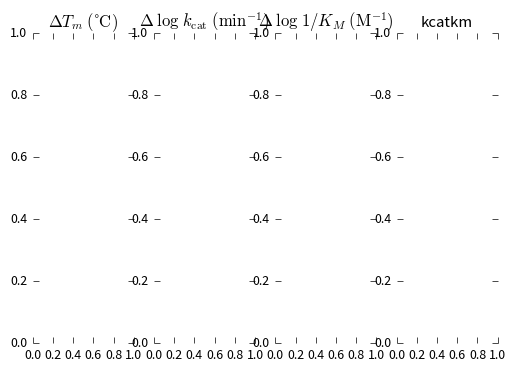

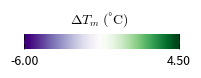

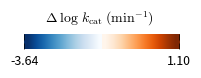

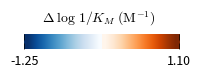

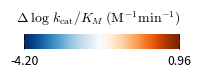

In [35]:
fig, ax = plt.subplots( nrows=1, ncols=4 ) 
for i in range( 4 ):
    ax[i].set_title( label[i] ) 
    # ok, for for each row, make a list 
# add the list to my_list 
#plt.style.use( 'bmh' ) 
def make_colorbars( short_name='tm', label=r'$\Delta T_m \; \mathrm{(˚C)}$', pos_cmap=Greens, neg_cmap=Purples, pos_max=4.5, neg_max=-6 ):
    
    fig, ax = plt.subplots( 1, 2, figsize=(2,1) ) 
    fig.suptitle( label ) 
    
    pos_vals = np.linspace( 0, pos_max, 10 ) 
    neg_vals = np.linspace( abs(neg_max), 0, 10 ) 
    
    ax[0].imshow( np.vstack(2*[neg_vals]), cmap=neg_cmap, extent=(0,10,0,2) ) 
    ax[1].imshow( np.vstack(2*[pos_vals]), cmap=pos_cmap, extent=(0,10,0,2) )
    ax[0].set_xlim( 0, 10 )
    ax[1].set_xlim( 0, 10 ) 
        
    ax[0].set_xticks([0])
    ax[0].set_xticklabels(['{0:2.2f}'.format(neg_max)])
    ax[0].set_yticks([])
    
    ax[1].set_xticks([10])
    ax[1].set_xticklabels(['{0:2.2f}'.format(pos_max)])
    ax[1].set_yticks([])
    
    fig.subplots_adjust( wspace=0, top=1.2 )
    fig.savefig( 'paper_draft/fig/legend_{}.png'.format( short_name ), dpi=600 )
    
make_colorbars()
for const, const_label in [ 
    ('kcat', r'$\Delta \; \mathrm{log} \; k_{\mathrm{cat}} \; (\mathrm{min}^{-1})$' ), 
    ('km', r'$\Delta \; \mathrm{log} \; 1/K_M \; (\mathrm{M}^{-1}) }$'), 
    ('kcatkm', '$\Delta \; \mathrm{log} \; k_{\mathrm{cat}}/K_M \; (\mathrm{M}^{-1} \mathrm{min}^{-1})$ ') 
]: make_colorbars( short_name=const, label=const_label, pos_cmap=Oranges, neg_cmap=Blues, pos_max=df['target_{}'.format(const)].max(), neg_max=df['target_{}'.format(const)].min() )
    
def color_tm( x, const='tm' ):
    if np.isnan( x ):
        return (0,0,0,0)
    elif abs( 0 - x ) < 0.05:
        return (1,1,1,1)
    elif x > 0:
        return Greens( x / df['target_{}'.format(const)].max() )
    else:
        return Purples( x / df['target_{}'.format(const)].min() ) 

def color_const( x, const ):
    if np.isnan( x ):
        return (0,0,0,0)
    elif abs( 0 - x ) < 0.05:
        return (1,1,1,1)
    elif x > 0:
        return Oranges( x / df['target_{}'.format(const)].max() )
    else:
        return Blues( x / df['target_{}'.format(const)].min() ) 
    
my_list = []
for index, row in df.iterrows():
    my_list.append( [
        Greys( row.expression + 0.25 ), 
        color_tm( row.target_tm ),
        color_const( row.target_kcat, 'kcat' ),
        color_const( row.target_km, 'km' ),
        color_const( row.target_kcatkm, 'kcatkm' ),
        Reds( row.conserved ), 
    ] )
my_array = np.array( my_list ) 

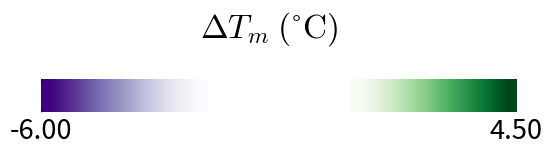

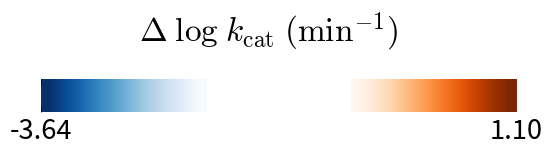

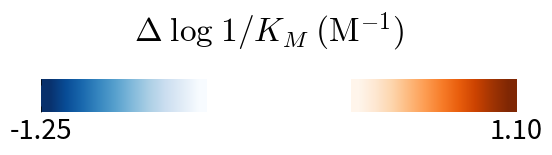

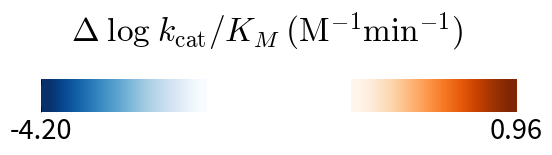

In [34]:
# ok, for for each row, make a list 
# add the list to my_list 
#plt.style.use( 'bmh' ) 
def make_colorbars( short_name='tm', label=r'$\Delta T_m \; \mathrm{(˚C)}$', pos_cmap=Greens, neg_cmap=Purples, pos_max=4.5, neg_max=-6 ):
    
    fig, ax = plt.subplots( 1, 2, figsize=(8,1.2) ) 
    fig.suptitle( label, fontsize=24 ) 
    
    pos_vals = np.linspace( 0, pos_max, 10 ) 
    neg_vals = np.linspace( abs(neg_max), 0, 10 ) 
    
    ax[0].imshow( np.vstack(2*[neg_vals]), cmap=neg_cmap, extent=(0,10,0,2) ) 
    ax[1].imshow( np.vstack(2*[pos_vals]), cmap=pos_cmap, extent=(0,10,0,2) )
    ax[0].set_xlim( 0, 10 )
    ax[1].set_xlim( 0, 10 ) 
        
    ax[0].set_xticks([0])
    ax[0].set_xticklabels(['{0:2.2f}'.format(neg_max)], fontsize=22)
    ax[0].set_yticks([])
    ax[0].tick_params(axis=u'top', which=u'both', length=0)
    ax[0].tick_params(axis=u'bottom', which=u'both', length=22, direction='out')
    
    #ax[1].set_xticks([0,10])
    ax[1].set_xticks([10])
    #ax[1].set_xticklabels(['0','{0:2.2f}'.format(pos_max)])
    ax[1].set_xticklabels(['{0:2.2f}'.format(pos_max)], fontsize=22)
    ax[1].set_yticks([])
    ax[1].tick_params(axis=u'both', which=u'both',length=0)
    
    fig.subplots_adjust( wspace=0, top=0.4 )
    
    return fig, ax 
    
make_colorbars()
for const, const_label in [ 
    ('kcat', r'$\Delta \; \mathrm{log} \; k_{\mathrm{cat}} \; (\mathrm{min}^{-1})$' ), 
    ('km', r'$\Delta \; \mathrm{log} \; 1/K_M \; (\mathrm{M}^{-1}) }$'), 
    ('kcatkm', '$\Delta \; \mathrm{log} \; k_{\mathrm{cat}}/K_M \; (\mathrm{M}^{-1} \mathrm{min}^{-1})$ ') 
]: make_colorbars( short_name=const, label=const_label, pos_cmap=Oranges, neg_cmap=Blues, pos_max=df['target_{}'.format(const)].max(), neg_max=df['target_{}'.format(const)].min() )
    
def color_tm( x, const='tm' ):
    if np.isnan( x ):
        return (0,0,0,0)
    elif abs( 0 - x ) < 0.05:
        return (1,1,1,1)
    elif x > 0:
        return Greens( x / df['target_{}'.format(const)].max() )
    else:
        return Purples( x / df['target_{}'.format(const)].min() ) 

def color_const( x, const ):
    if np.isnan( x ):
        return (0,0,0,0)
    elif abs( 0 - x ) < 0.05:
        return (1,1,1,1)
    elif x > 0:
        return Oranges( x / df['target_{}'.format(const)].max() )
    else:
        return Blues( x / df['target_{}'.format(const)].min() ) 
    
my_list = []
for index, row in df.iterrows():
    my_list.append( [
        Greys( row.expression + 0.25 ), 
        color_tm( row.target_tm ),
        color_const( row.target_kcat, 'kcat' ),
        color_const( row.target_km, 'km' ),
        color_const( row.target_kcatkm, 'kcatkm' ),
        Reds( row.conserved ), 
    ] )
my_array = np.array( my_list ) 

Columns: 5
Mutants per column: 26
Mutants in heat map: 130
Actual number of mutants: 129



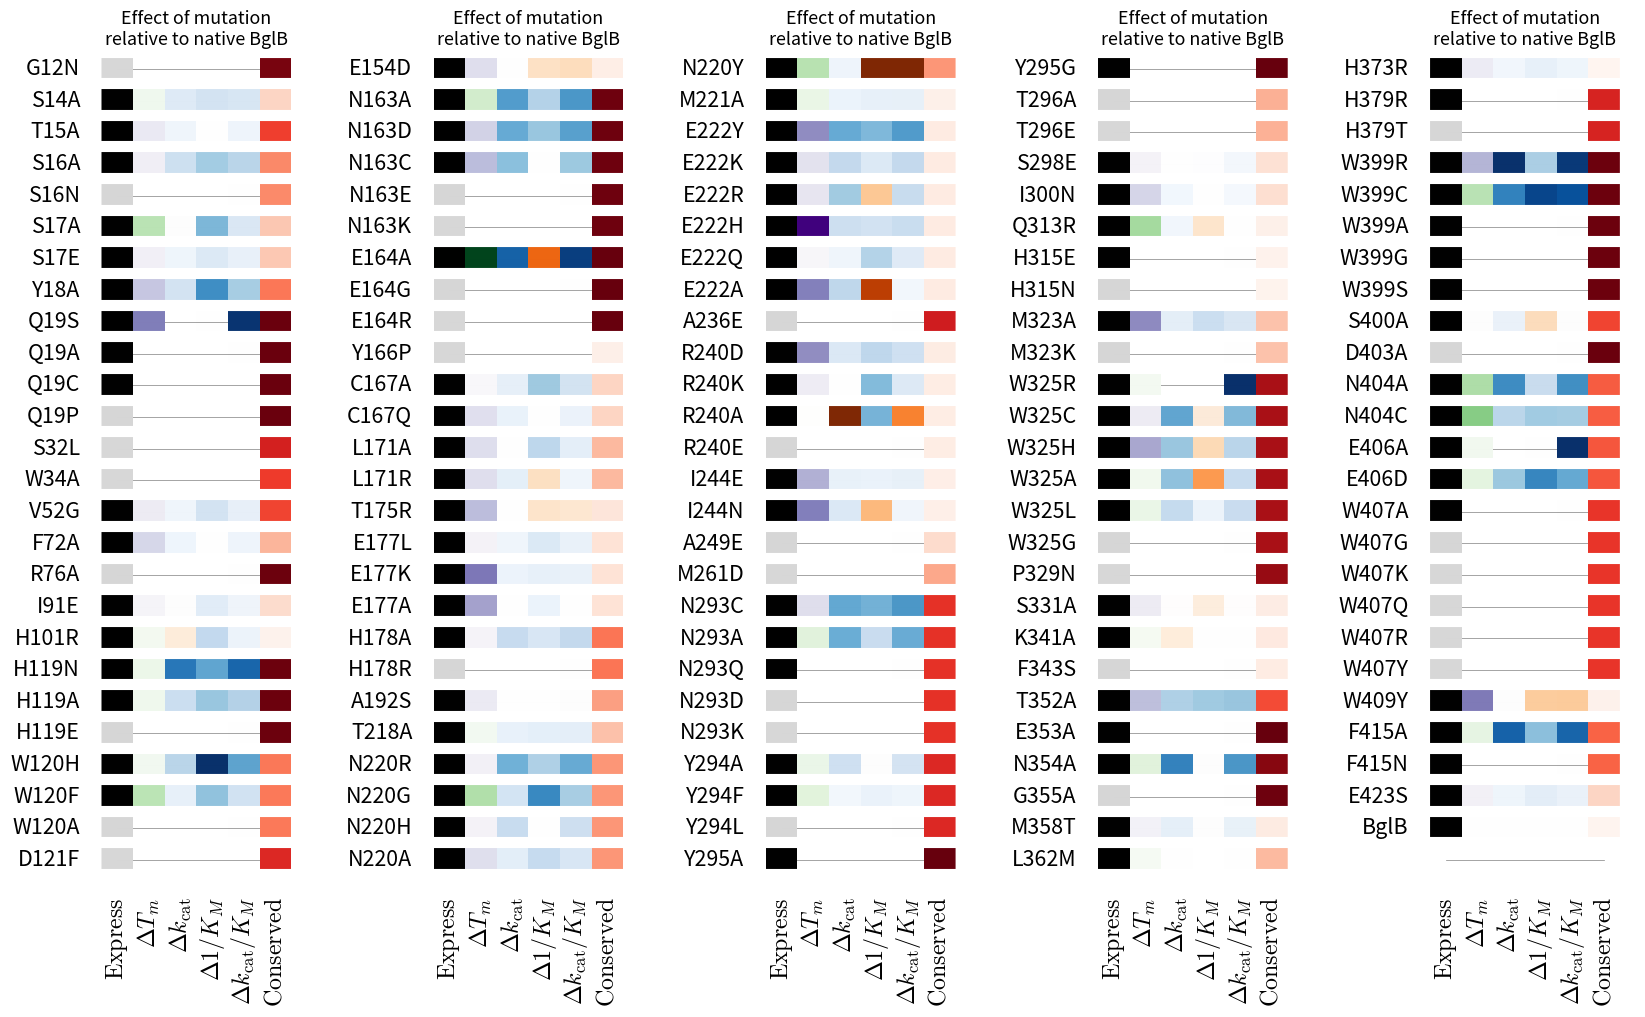

In [27]:
#plt.style.use( 'bmh' ) 

cols = 5
c = math.ceil( len( df ) / cols ) 
print( 'Columns: {}\nMutants per column: {}\nMutants in heat map: {}\nActual number of mutants: {}\n'.format( cols, c, cols*c, len(df) ) ) 
fig, axes = plt.subplots( 1, cols, figsize=( cols * 4, c * 4 ) ) 

for i, ax in enumerate( axes ):
    ax.imshow( X=my_array[i*c:(i*c)+c,:], interpolation='none', origin='upper', aspect='equal', zorder=1 ) 
    index = list( range( len( df ) ) )
    ax.set_title( 'Effect of mutation\nrelative to native BglB', fontsize='x-large' )
    ax.set_yticks( index[:c] ) 
    ax.set_yticklabels( df.index[i*c:(i*c)+c], fontsize='xx-large' )
    ax.tick_params( length=0 )
    my_labels = ( '', r'$\mathrm{Express}$', r'$\Delta T_m$', r'$\Delta k_\mathrm{{cat}}$', r'$\Delta 1/K_M$', '$\Delta k_\mathrm{{cat}}/K_M$', r'$\mathrm{Conserved}$' ) 
    ax.set_xticklabels( my_labels, fontsize='xx-large', rotation=90 )
    # white lines 
    for i in range( c+1 ):
        ax.plot( (-0.4,6), (i-.55,i-.55), linewidth=8, color='white', zorder=2 ) 
    # black lines 
    for i in range( c+1 ):
        ax.plot( (0,5), (i,i), linewidth=0.5, color='gray', zorder=0 ) 

fig.subplots_adjust( wspace=.1*cols, ) 
#fig.savefig( '/Users/alex/Desktop/heat.png', dpi=600 )
plt.show()